In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/Workation Price Prediction Challenge/Participant_Data_WPPH.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("/content/Participant_Data_WPPH/Train.csv")

In [ ]:
train[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
test = pd.read_csv('/content/Participant_Data_WPPH/Test.csv')
submission = pd.read_csv('/content/Participant_Data_WPPH/sample submission.csv')

In [ ]:
train.shape

(21000, 15)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [ ]:
train.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [ ]:
##finding the missing values
train.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [ ]:
train.describe()

,Flight Stops,Meals,Per Person Price
count,21000.000000,21000.000000,21000.000000
mean,0.870286,3.665429,20059.330381
std,0.834989,0.893631,11643.641766
min,0.000000,2.000000,791.000000
25%,0.000000,3.000000,12461.000000
50%,1.000000,3.000000,17765.500000
75%,2.000000,5.000000,25081.375000
max,2.000000,5.000000,171062.500000


In [ ]:
train['Travel Date'] = pd.to_datetime(train['Travel Date'])

In [ ]:
train.dtypes

Uniq Id                               object
Package Name                          object
Package Type                          object
Destination                           object
Itinerary                             object
Places Covered                        object
Travel Date                   datetime64[ns]
Hotel Details                         object
Start City                            object
Airline                               object
Flight Stops                           int64
Meals                                  int64
Sightseeing Places Covered            object
Cancellation Rules                    object
Per Person Price                     float64
dtype: object

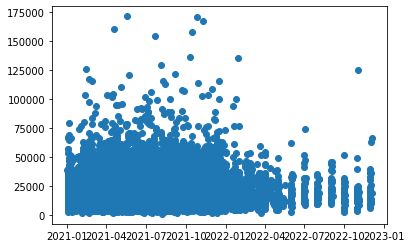

In [ ]:
plt.scatter(train['Travel Date'],train['Per Person Price'])

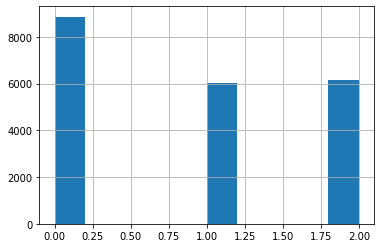

In [ ]:
train['Flight Stops'].hist()

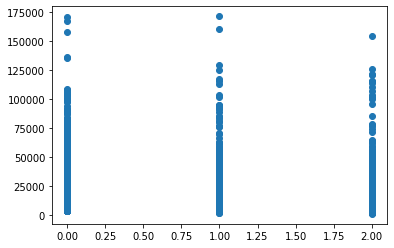

In [ ]:
plt.scatter(train['Flight Stops'],train['Per Person Price'])

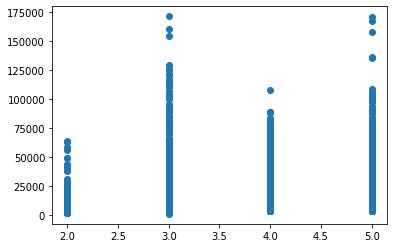

In [ ]:
plt.scatter(train['Meals'],train['Per Person Price'])

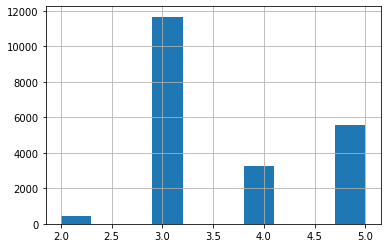

In [ ]:
train['Meals'].hist()

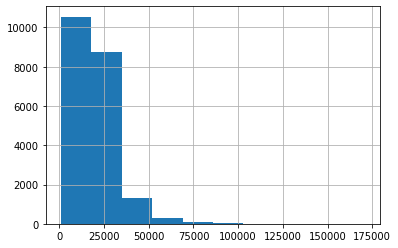

In [ ]:
train['Per Person Price'].hist()

In [ ]:
# select numerical and categorical features
def divideFeatures(train):
    numerical_features = train.select_dtypes(include=[np.number])
    categorical_features = train.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [ ]:
continuous_data, categorical_data = divideFeatures(train)
categorical_data[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [ ]:
continuous_data[:5]

,Flight Stops,Meals,Per Person Price
0,2,3,11509.0
1,0,5,22485.5
2,0,4,12421.5
3,0,5,35967.0
4,0,5,25584.0


In [ ]:
for c in continuous_data.columns:
  print('\n Number of unique of in {}:'.format(c),train[c].nunique())


 Number of unique of in Flight Stops: 3

 Number of unique of in Meals: 4

 Number of unique of in Per Person Price: 17138


In [ ]:
for c in categorical_data.columns:
  print('\n Number of unique of in {}:'.format(c),train[c].nunique())


 Number of unique of in Uniq Id: 21000

 Number of unique of in Package Name: 2204

 Number of unique of in Package Type: 5

 Number of unique of in Destination: 565

 Number of unique of in Itinerary: 966

 Number of unique of in Places Covered: 565

 Number of unique of in Hotel Details: 6060

 Number of unique of in Start City: 2

 Number of unique of in Airline: 314

 Number of unique of in Sightseeing Places Covered: 1714

 Number of unique of in Cancellation Rules: 10


In [ ]:
categorical_data.shape

(21000, 11)

In [ ]:
df_train = train.drop(columns=['Uniq Id'])
print('Shape',df_train.shape)
df_train.head(2)

Shape (21000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5


In [ ]:
continuous_data, categorical_data = divideFeatures(df_train)
categorical_data[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [ ]:
categorical_data.shape

(21000, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in categorical_data:
  df_train[col] = lb.fit_transform(df_train[col])

In [ ]:
print('Shape:',df_train.shape)
df_train.head(3)

Shape: (21000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,421,4,417,214,417,2021-07-30,3202,0,211,2,3,1713,5,11509.0
1,1138,3,533,283,533,2021-08-12,5463,1,125,0,5,524,0,22485.5
2,1417,2,549,700,549,2021-04-26,5092,1,114,0,4,1000,0,12421.5


In [ ]:
# Converting Dep_Time from object (string) to time format
#train.Travel Date=pd.to_datetime(train.Travel Date, format= '%Y:%M').dt.date

In [ ]:
df_train['Year']=pd.DatetimeIndex(df_train['Travel Date']).year
df_train['month']=pd.DatetimeIndex(df_train['Travel Date']).month


In [ ]:
df_train[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,421,4,417,214,417,2021-07-30,3202,0,211,2,3,1713,5,11509.0,2021,7
1,1138,3,533,283,533,2021-08-12,5463,1,125,0,5,524,0,22485.5,2021,8
2,1417,2,549,700,549,2021-04-26,5092,1,114,0,4,1000,0,12421.5,2021,4
3,486,3,329,527,329,2021-08-27,866,1,114,0,5,1094,0,35967.0,2021,8
4,196,3,443,921,443,2021-12-12,823,1,238,0,5,336,0,25584.0,2021,12


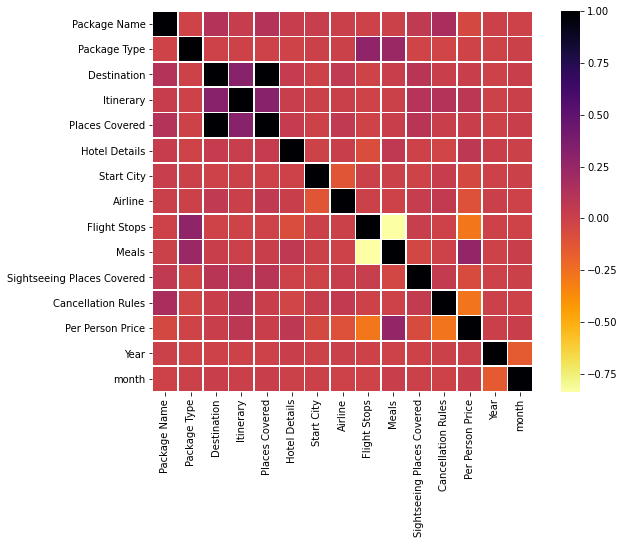

In [ ]:
c = df_train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(c, vmax=1,linewidths=.5,cmap="inferno_r",square=True,)

In [ ]:
df_train['Per Person Price'] = np.log(df_train['Per Person Price'])

In [ ]:
df_train[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,421,4,417,214,417,2021-07-30,3202,0,211,2,3,1713,5,9.350885,2021,7
1,1138,3,533,283,533,2021-08-12,5463,1,125,0,5,524,0,10.020626,2021,8
2,1417,2,549,700,549,2021-04-26,5092,1,114,0,4,1000,0,9.427184,2021,4
3,486,3,329,527,329,2021-08-27,866,1,114,0,5,1094,0,10.490357,2021,8
4,196,3,443,921,443,2021-12-12,823,1,238,0,5,336,0,10.149722,2021,12


In [ ]:
X = df_train.drop(columns=['Per Person Price','Travel Date'])
print('Shape:',X.shape)
X.head(2)

Shape: (21000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,421,4,417,214,417,3202,0,211,2,3,1713,5,2021,7
1,1138,3,533,283,533,5463,1,125,0,5,524,0,2021,8


In [ ]:
#for i in X.columns:
 #  X[i].hist()

In [ ]:
#target variable Y
y=df_train['Per Person Price']
#print('Shape:',y.shape)

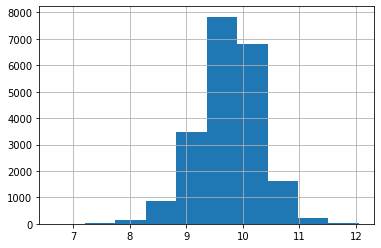

In [ ]:
y.hist()


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 52kB/s 


In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import sklearn.model_selection as skms 
from sklearn.tree import DecisionTreeRegressor

In [ ]:
 from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [
     ('xg',ExtraTreesRegressor(random_state = 1)),
     ('rf', RandomForestRegressor(random_state = 1)),
     ('BR',BaggingRegressor(random_state = 1)),
     ('cat',CatBoostRegressor(random_state = 1))
     ]


In [ ]:
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=CatBoostRegressor(n_estimators=200))

In [ ]:
stk_pred=reg.fit(X,y).predict(df_test)

Streaming output truncated to the last 5000 lines.
205:	learn: 0.2919267	total: 1.05s	remaining: 4.03s
206:	learn: 0.2915327	total: 1.05s	remaining: 4.03s
207:	learn: 0.2912652	total: 1.05s	remaining: 4.02s
208:	learn: 0.2910050	total: 1.06s	remaining: 4.01s
209:	learn: 0.2907064	total: 1.06s	remaining: 4.01s
210:	learn: 0.2904590	total: 1.07s	remaining: 4s
211:	learn: 0.2901016	total: 1.07s	remaining: 3.99s
212:	learn: 0.2898820	total: 1.08s	remaining: 3.99s
213:	learn: 0.2896973	total: 1.08s	remaining: 3.98s
214:	learn: 0.2894458	total: 1.09s	remaining: 3.98s
215:	learn: 0.2892824	total: 1.09s	remaining: 3.97s
216:	learn: 0.2890376	total: 1.1s	remaining: 3.96s
217:	learn: 0.2887193	total: 1.1s	remaining: 3.96s
218:	learn: 0.2883672	total: 1.11s	remaining: 3.95s
219:	learn: 0.2881433	total: 1.11s	remaining: 3.95s
220:	learn: 0.2879214	total: 1.12s	remaining: 3.94s
221:	learn: 0.2875433	total: 1.12s	remaining: 3.94s
222:	learn: 0.2873206	total: 1.13s	remaining: 3.93s
223:	learn: 0.2871

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
for c in X.columns:
    X[c] = rs.fit_transform(X[c].values.reshape(-1, 1))
X.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,-0.549864,0.333333,0.435252,-0.690476,0.435252,0.000000,-1.0,0.000000,0.5,0.0,0.826087,5.0,0.0,0.2
1,0.100181,0.000000,0.852518,-0.541126,0.852518,0.857576,0.0,-0.728814,-0.5,1.0,-0.609903,0.0,0.0,0.4
2,0.353128,-0.333333,0.910072,0.361472,0.910072,0.716859,0.0,-0.822034,-0.5,0.5,-0.035024,0.0,0.0,-0.4
3,-0.490934,0.000000,0.118705,-0.012987,0.118705,-0.886023,0.0,-0.822034,-0.5,1.0,0.078502,0.0,0.0,0.4
4,-0.753853,0.000000,0.528777,0.839827,0.528777,-0.902333,0.0,0.228814,-0.5,1.0,-0.836957,0.0,0.0,1.2


In [ ]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
rs = MinMaxScaler()
for c in X.columns:
    X[c] = rs.fit_transform(X[c].values.reshape(-1, 1))
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=30)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#param_grid = {  'num_leaves': [20,40,60,80], 'learning_rate': [0.05, 0.01,0.1], 'max_features': ['auto', 'log2'], 'n_estimators': [500,700,1200,1500]}

In [ ]:
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
#from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
#rfr = LGBMRegressor(random_state = 1)

#g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                        #  cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
#g_search.fit(X, y);

In [ ]:
#print(g_search.best_params_)

In [ ]:
lightgbm=LGBMRegressor(objective='regression',num_leaves=20,
                              learning_rate=0.1, n_estimators=1500,
                              max_bin = 30 , max_features='auto', random_state=10)

In [ ]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [ ]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)


In [ ]:
svr = Pipeline([('Scaler',RobustScaler()), ('SVR',SVR(C= 10000, epsilon= 0.008, gamma=0.009))])

In [ ]:

krr=KernelRidge(alpha=1, kernel='polynomial', gamma=0.001,degree=3,coef0=5)
#rmsle_cv(krr).mean(), rmsle_cv(krr).std() # Commented for faster running of complete code

In [ ]:
rf=RandomForestRegressor(n_estimators=3000, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "auto", min_samples_leaf = 2,warm_start=True,criterion='mse',max_depth=50)

In [ ]:
# Final ensemble that uses outputs from each model regressor and the original data in the meta regressor XGB
avg=StackingCVRegressor(regressors=(lightgbm,grb,rf),meta_regressor=xgb, use_features_in_secondary=True)#,svr,krr,

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
mslr = mean_squared_log_error(y_pred,y_test)
np.log(mslr)

-6.288919523645859

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=1, min_samples_split=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mslr = mean_squared_log_error(y_pred,y_test)
np.log(mslr)


-6.099500509448365

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,max_depth=1, min_samples_split=9,bootstrap=False, oob_score=False, n_jobs=None, random_state=None,)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mslr = mean_squared_log_error(y_pred,y_test)
np.log(mslr)

-6.098276911097703

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mslr = mean_squared_log_error(y_pred,y_test)
np.log(mslr)

-7.234769128425119

In [ ]:
print('Shape:',test.shape)
test.head(2)

Shape: (9000, 14)


,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...


In [ ]:
test['Year']=pd.DatetimeIndex(test['Travel Date']).year
test['month']=pd.DatetimeIndex(test['Travel Date']).month


In [ ]:
df_test = test.drop(columns=['Uniq Id','Travel Date'])
print('shape:',df_test.shape)
df_test.head(2)

shape: (9000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...,2021,7
1,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...,2021,3


In [ ]:
cat_col = df_test.select_dtypes('object')
cat_col.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Hotel Details', 'Start City', 'Airline',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_col:
  df_test[col] = lb.fit_transform(df_test[col])

In [ ]:
print('shape:',df_test.shape)
df_test.head(2)

shape: (9000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,797,2,177,918,178,1959,1,80,0,4,1475,0,2021,7
1,1003,2,39,308,40,3442,1,147,0,4,66,6,2021,3


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
for c in df_test.columns:
    df_test[c] = rs.fit_transform(df_test[c].values.reshape(-1, 1))
df_test.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,-0.172887,-0.333333,-0.407609,0.884701,-0.407609,0.003156,0.0,-0.87013,-0.5,0.5,0.826435,0.0,0.0,0.2
1,0.025524,-0.333333,-0.907609,-0.467849,-0.907609,0.939246,0.0,0.00000,-0.5,0.5,-1.054740,6.0,0.0,-0.6
2,0.958825,0.333333,0.088768,0.583149,0.088768,0.000000,0.0,0.00000,0.5,0.0,0.196262,6.0,1.0,0.6
3,0.368408,-0.666667,0.088768,0.583149,0.088768,0.000000,-1.0,0.00000,0.0,0.0,0.624833,6.0,0.0,-0.2
4,0.791235,-0.333333,-0.733696,-1.011086,-0.733696,-1.112829,0.0,-0.87013,-0.5,0.5,-0.371162,0.0,0.0,0.8


In [ ]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
rs = MinMaxScaler()
for c in df_test.columns:
    df_test[c] = rs.fit_transform(df_test[c].values.reshape(-1, 1))
df_test.head()

In [ ]:
# Function to calculate RMSE error of the complete model for reference, similiar to rmsle_cv without KFOLD CV
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:

X=np.array(X)
Y=np.array(y)

In [ ]:
# Fitting the model on the train data and predicting the train price values
avg.fit(X,Y)
y_pred=avg.predict(X)

[10:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


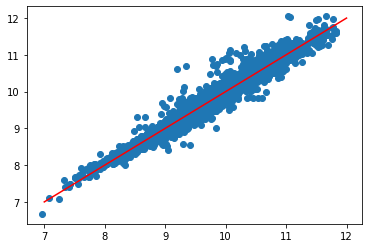

In [ ]:
# Plot of the model prediction with the original price values in the training data set to undestand model fit
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [ ]:
# RMSE value of the model on training data
rmsle(y,y_pred)

0.09185323435259123

In [ ]:
Predict=avg.predict(np.array(df_test))

In [ ]:
prediction = lr.predict(df_test)
prediction

array([10.08271804,  9.62815567,  9.21321915, ..., 10.01132148,
        9.85425323,  9.1160632 ])

In [ ]:
print('shape:',submission.shape)
submission.head()

shape: (9000, 1)


,Per Person Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
Predict=np.exp(stk_pred)
#Predict=Predict.astype(int)

In [ ]:
submission = pd.DataFrame({'Per Person Price':Predict})
submission.head()

,Per Person Price
0,20222.396404
1,8467.987178
2,6101.996194
3,7912.336739
4,23852.843076


In [ ]:
submission.to_csv('sub_stk_reg-1.csv',index=False)

In [ ]:
s = pd.read_csv('/content/sub_lr.csv')
s.head()

,Per Person Price
0,23925.928887
1,15186.401533
2,10028.829250
3,12078.777295
4,21123.873449


In [ ]:
prediction = rf.predict(df_test)
prediction

array([9.84663993, 9.32041974, 9.32041974, ..., 9.84663993, 9.84663993,
       9.32041974])

In [ ]:
Predict=np.exp(prediction)
Predict=Predict.astype(int)

In [ ]:
submission = pd.DataFrame({'Per Person Price':Predict})
submission.head()

,Per Person Price
0,18894
1,11163
2,11163
3,11163
4,18894


In [ ]:
submission.to_csv('sub_rf-1.csv',index=False)

In [ ]:
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
#from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
df_train[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,421,4,417,214,417,2021-07-30,3202,0,211,2,3,1713,5,9.350885
1,1138,3,533,283,533,2021-08-12,5463,1,125,0,5,524,0,10.020626
2,1417,2,549,700,549,2021-04-26,5092,1,114,0,4,1000,0,9.427184
3,486,3,329,527,329,2021-08-27,866,1,114,0,5,1094,0,10.490357
4,196,3,443,921,443,2021-12-12,823,1,238,0,5,336,0,10.149722


In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in df_train.columns:
    if i!='Price':
        if df_train[i].dtype in numeric_dtypes: 
            numerics2.append(i)

skew_features = df_train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
print(skews)

high_skew = skew_features[abs(skew_features) > 0.3]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
     if i!='=Price':
        df_train[i]= boxcox1p(df_train[i], boxcox_normmax(df_train[i]+1))

        
skew_features2 = df_train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

                                skew
Cancellation Rules          1.987642
Meals                       0.520251
Flight Stops                0.246975
Package Name                0.066586
Places Covered              0.003925
Destination                 0.003925
Hotel Details              -0.092840
Package Type               -0.151273
Itinerary                  -0.187653
Per Person Price           -0.231116
Sightseeing Places Covered -0.273442
Airline                    -0.274097
Start City                 -0.647255


,skew
Cancellation Rules,1.901493
Flight Stops,0.246975
Meals,0.132415
Package Name,0.066586
Places Covered,0.003925
Destination,0.003925
Hotel Details,-0.092840
Package Type,-0.151273
Itinerary,-0.187653
Per Person Price,-0.231116


In [ ]:
x = df_train.drop(columns=['Per Person Price','Travel Date'])
print('Shape:',x.shape)
x.head(2)

Shape: (21000, 12)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,421,4,417,214,417,3202,0.000000,211,2,0.854099,1713,2.516497
1,1138,3,533,283,533,5463,7.399732,125,0,0.974643,524,0.000000


In [ ]:
#target variable Y
y=df_train['Per Person Price']
#print('Shape:',y.shape)

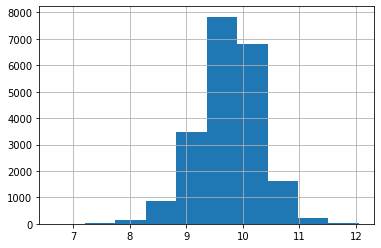

In [ ]:
y.hist()

In [ ]:
def rmsle_cv(model):
    kfold=KFold(n_splits=2, shuffle=True, random_state=10).get_n_splits(X)
    rmse=np.sqrt(-cross_val_score(model,x,y,cv=kfold, scoring='neg_mean_squared_error'))
    return rmse

In [ ]:
lightgbm=LGBMRegressor(objective='regression',num_leaves=80,
                              learning_rate=0.1, n_estimators=1200,
                              max_bin = 30, bagging_fraction = 0.8,
                              bagging_freq = 9, feature_fraction = 0.129,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 6, random_state=10)
                            

In [ ]:
rmsle_cv(lightgbm).mean(),rmsle_cv(lightgbm).std()

(0.34587654365368115, 0.0018823329410872225)

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
X=np.array(x)
Y=np.array(y)

In [ ]:
lightgbm.fit(X,Y)
y_pred=lightgbm.predict(X)

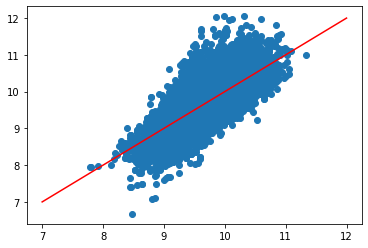

In [ ]:
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [ ]:
rmsle(y,y_pred)

0.33947494180708754

In [ ]:
# Predictions of test data
Predict=lightgbm.predict(np.array(df_test))

In [ ]:
Predict

array([10.2785395 ,  9.99842991,  9.27053536, ..., 11.1998556 ,
       10.35555482,  9.14583824])

In [ ]:
Predict=np.exp(Predict)
Predict=Predict.astype(int)

In [ ]:
Predict

array([29101, 21991, 10620, ..., 73119, 31431,  9375])

In [ ]:
submission = pd.DataFrame({'Per Person Price':Predict})
submission.head()

,Per Person Price
0,29101
1,21991
2,10620
3,10099
4,31431


In [ ]:
submission.to_csv('sub_lgbm-1.csv',index=False)

In [ ]:
read=pd.read_csv("sub_lgbm-1.csv")
read

,Per Person Price
0,29101
1,21991
2,10620
3,10099
4,31431
...,...
8995,6524
8996,15589
8997,73119
8998,31431
